Drive'ı içeri aktar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Kütüphaneleri yükle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Veri kümelerini ekle

In [ ]:
happy_data2019 = pd.read_csv('/content/drive/MyDrive/archive/2019.csv')

Verilerden bazılarını işlemleri kolaylaştırmak açısından görüntüle

In [ ]:
happy_data2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
happy_data2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [ ]:
features_happies = ['Country or region', 'GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices', 'Perceptions of corruption']


In [ ]:
# LabelEncoder oluşturalım
label_encoder = LabelEncoder()

# 'Country or region' sütununu dönüştürelim
happy_data2019['Country or region encoded'] = label_encoder.fit_transform(happy_data2019['Country or region'])

# Yeni sütunu görüntüleyelim
print(happy_data2019[['Country or region', 'Country or region encoded']])


            Country or region  Country or region encoded
0                     Finland                         43
1                     Denmark                         36
2                      Norway                        105
3                     Iceland                         57
4                 Netherlands                         98
..                        ...                        ...
151                    Rwanda                        117
152                  Tanzania                        137
153               Afghanistan                          0
154  Central African Republic                         24
155               South Sudan                        128

[156 rows x 2 columns]


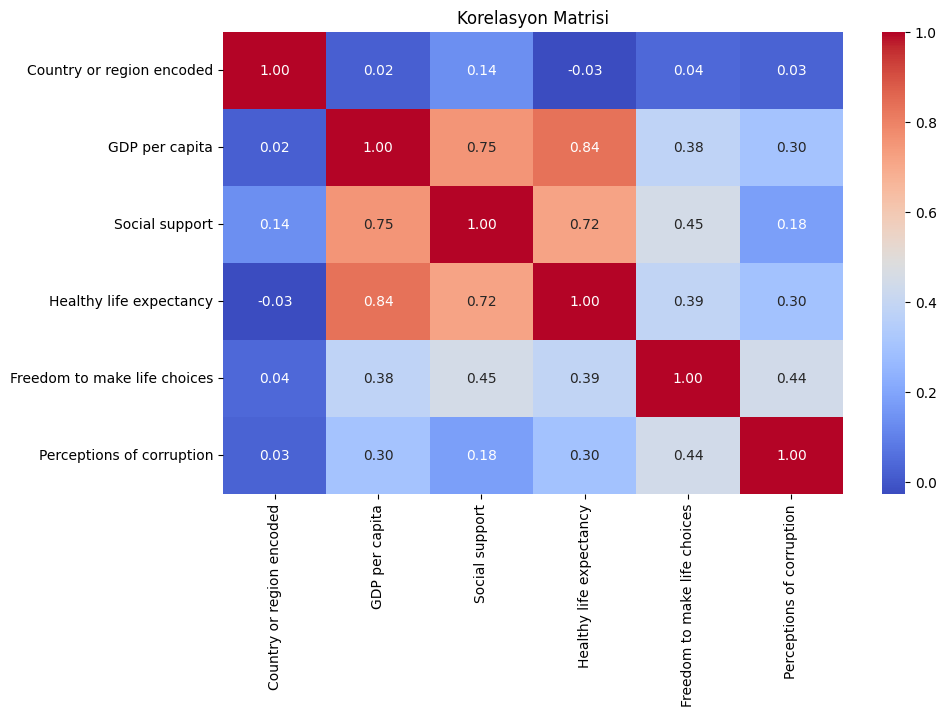

In [ ]:
# Korelasyon matrisini hesaplayalım
features_happies = ['Country or region encoded', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']
corr_matrix = happy_data2019[features_happies].corr()

# Korelasyon matrisini görselleştirelim
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

In [ ]:
missing_data = happy_data2019.isnull().sum()
print("Eksik Veri Sayısı:")
print(missing_data)

Eksik Veri Sayısı:
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Country or region encoded       0
dtype: int64


In [ ]:
# Aykırı değerleri tespit etmek için IQR yöntemini kullanalım
def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers

# Aykırı değerleri bulmak istediğimiz sütunları seçelim
columns_to_check = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']

# Her sütun için aykırı değerleri bulalım
for column in columns_to_check:
    outliers = find_outliers_iqr(happy_data2019[column])
    print(f"{column} Aykırı Değerler:")
    print(outliers)


GDP per capita Aykırı Değerler:
[]
Social support Aykırı Değerler:
[0.437, 0.447, 0.378, 0.0]
Healthy life expectancy Aykırı Değerler:
[0.0]
Freedom to make life choices Aykırı Değerler:
[0.0]
Perceptions of corruption Aykırı Değerler:
[0.393, 0.41, 0.341, 0.298, 0.343, 0.373, 0.38, 0.308, 0.29, 0.316, 0.31, 0.453, 0.287, 0.411]


In [ ]:
# Verileri özellikler ve hedef değişken olarak bölelim
X = happy_data2019[features_happies]
y = happy_data2019['Score']

# Verileri train ve test kümelerine bölelim
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Kalan verileri test ve validasyon kümelerine bölelim
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Her bir kümenin boyutunu kontrol edelim
print("Train veri kümesi boyutu:", X_train.shape)
print("Test veri kümesi boyutu:", X_test.shape)
print("Validasyon veri kümesi boyutu:", X_valid.shape)


Train veri kümesi boyutu: (109, 6)
Test veri kümesi boyutu: (23, 6)
Validasyon veri kümesi boyutu: (24, 6)
